In [1]:
# import packages
import pandas
import numpy

In [9]:
# read in data
data = pandas.read_csv("Cereals.csv")

In [19]:
print(data.head()) # see the data

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4             Almond_Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0     6.0   280.0        25      3     1.0  0.33  68.402973  
1    8.0     8.0   135.0         0      3     1.0  1.00  33.983679  
2    7.0     5.0   320.0        25      3     1.0  0.33  59.425505  
3    8.0     0.0   330.0        25      3     1.0  0.50  93.704912  
4   14.0     8.0     NaN        25      3     1.0  0.75  34.384843  


# Summary Statistics

In [16]:
# statistic of numeric values
print(data.describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  76.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.802632   
std     19.484119   1.094790   1.006473   83.832295   2.383364   3.907326   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.500000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  76.000000   75.000000   77.000000  77.000000  77.000000  77.000000   
mean    7.026316   98.666667   28.246753   2.207792   1.029610   0.821039   
std     4.378656   70.410636   22.342523   0.832524   0.150477   0.232716  

In [30]:
# statistic of discreate values
print(data["mfr"].value_counts())
print("-"*17)
print(data["type"].value_counts())

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64
-----------------
C    74
H     3
Name: type, dtype: int64


In [15]:
data.shape

(77, 16)

# Quantitative/Numerical

In [33]:
# find the columns with values with less than 10 choices and print them
for col in data.columns:
    ct = data[col].unique().__len__()
    print(col,":",ct,end="\t")
    if ct < 10:
        print(data[col].unique(),end="")
    print()

name : 77	
mfr : 7	['N' 'Q' 'K' 'R' 'G' 'P' 'A']
type : 2	['C' 'H']
calories : 11	
protein : 6	[4 3 2 1 6 5]
fat : 5	[1 5 0 2 3]
sodium : 27	
fiber : 13	
carbo : 22	
sugars : 17	
potass : 36	
vitamins : 3	[ 25   0 100]
shelf : 3	[3 1 2]
weight : 7	[1.   1.33 1.25 1.3  1.5  0.5  0.83]
cups : 12	
rating : 77	


## conclude

So the `mfr`, `type` are nominal; `protein`, `shelf`, `fat` are ordinal

`vitamin` seems to be quantitative, but why there's only 3 possible values?

and others are quantitative.

# Histogram

In [46]:
# import pyplot
from matplotlib import pyplot as plt
import math

In [184]:
def histo(datas,interval,name,do_save):
    plt.figure(figsize=(4,4))
    lim_right = (math.ceil(max(datas)/interval))*interval
    lim_left = (math.floor(min(datas)/interval))*interval
    hist = plt.hist(datas,bins = numpy.arange(lim_left,lim_right+interval/2,interval).tolist(),edgecolor="blue")
    for i in range(len(hist[0])):
        plt.annotate(text=int(hist[0][i]), xy=(hist[1][i] + interval / 3, hist[0][i]))
    plt.title("histogram of {}, bin size {}".format(name,interval))
    if do_save:
        plt.savefig("figs/histo_{}.png".format(name))
    plt.show()
    

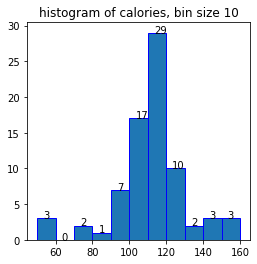

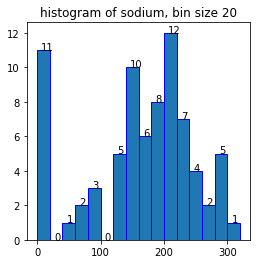

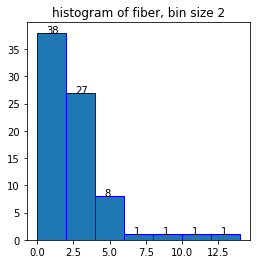

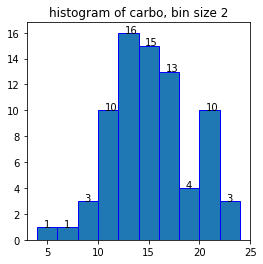

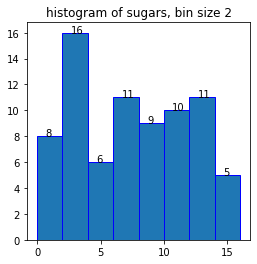

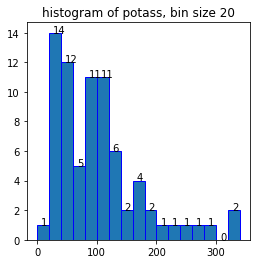

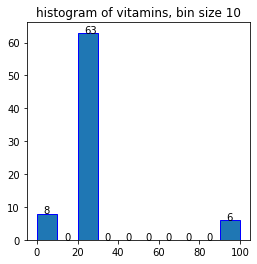

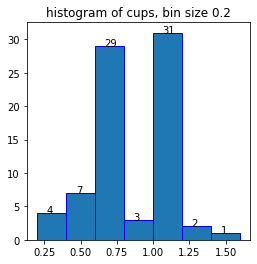

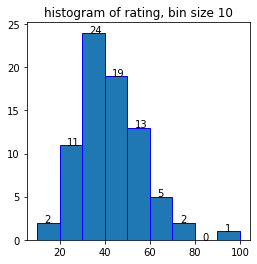

In [185]:
quantitative_cols = ["calories","sodium","fiber","carbo","sugars","potass","vitamins","cups","rating"]
for col in quantitative_cols:
    datas = data[col].values
    span = max(datas)-min(datas)
    interval = 20 if span >= 140 else 10 if span >=50 else 5 if span >= 20 else 2 if span >= 10 else 1 if span >= 5 else 0.5 if span >=2 else 0.2
    histo(datas,interval,col,True)

## Conclude

* `potass` and `sodium` have the largest variability.
* `rating`, `potass`, `vitamins` and `fiber` seems skewed.
    * in `rating`, the only max value seems extreme
    * in `potass`, the 2 max values seems extreme
    * in `sodium`, the 11 min vlaues seems extreme
    * in `calories`, the 3 min values seems extreme


# Boxplot

In [86]:
import seaborn

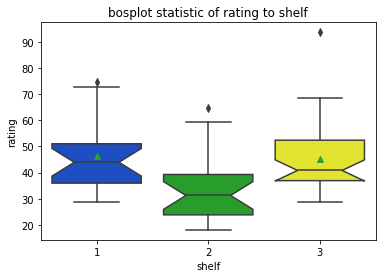

In [113]:
fig = seaborn.boxplot(
    data=data,
    x = "shelf",
    y = "rating",
    palette=[seaborn.xkcd_rgb["blue"], seaborn.xkcd_rgb["green"],seaborn.xkcd_rgb["yellow"]],
    showmeans=True,
    notch = True
)
fig.set_title("bosplot statistic of rating to shelf")
fig.figure.savefig("figs/boxplot_rating_to_shelf")
plt.show()

# Correlation

In [127]:
corr = data.corr()
corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,-0.192650,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.068377,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.385784,0.419933,-0.501607,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.192650,0.068377,0.385784,0.299262,1.000000,0.190762,-0.335269,0.025159


<AxesSubplot:>

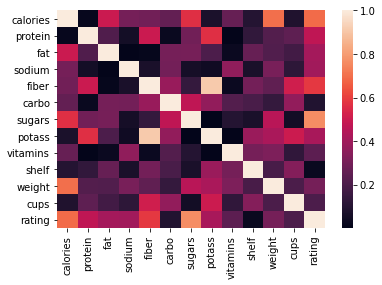

In [132]:
corr_abs = corr.applymap(lambda x:abs(x))
seaborn.heatmap(data.corr().applymap(lambda x:abs(x)))

In [125]:
data.corr()["rating"]

calories   -0.689376
protein     0.470618
fat        -0.409284
sodium     -0.401295
fiber       0.584160
carbo       0.088712
sugars     -0.763902
potass      0.416009
vitamins   -0.240544
shelf       0.025159
weight     -0.298124
cups       -0.203160
rating      1.000000
Name: rating, dtype: float64

In [142]:
corr_abs[(corr_abs > 0.6) & (corr_abs != 1)]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696091,NaN,0.689376
protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sodium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.911528,NaN,NaN,NaN,NaN,NaN
carbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sugars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.763902
potass,NaN,NaN,NaN,NaN,0.911528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shelf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

data_norm = data.drop("name",axis=1,inplace=False)
label_encoder = LabelEncoder()
for col in data_norm.columns:
    if data_norm[col].dtype == "object":
        data_norm[col] = label_encoder.fit_transform(data_norm[col])
imputer = SimpleImputer(strategy='mean')
data_norm_values = imputer.fit_transform(data_norm)
data_norm = pandas.DataFrame(data_norm_values,columns=data_norm.columns)
data_scaled_values = MinMaxScaler().fit_transform(data_norm)
data_scaled = pandas.DataFrame(data_scaled_values,columns=data_norm.columns)
data_norm_values = Normalizer().fit_transform(data_norm)
data_norm = pandas.DataFrame(data_norm_values,columns=data_norm.columns)

In [182]:
print(data_norm)
print(data_scaled)

         mfr  type  calories   protein       fat    sodium     fiber  \
0   0.009227   0.0  0.215307  0.012303  0.003076  0.399856  0.030758   
1   0.027034   0.0  0.648820  0.016221  0.027034  0.081103  0.010814   
2   0.004724   0.0  0.165340  0.009448  0.002362  0.614119  0.021258   
3   0.005332   0.0  0.133300  0.010664  0.000000  0.373239  0.037324   
4   0.023725   0.0  0.434956  0.007908  0.007908  0.790829  0.003954   
..       ...   ...       ...       ...       ...       ...       ...   
72  0.003518   0.0  0.386929  0.007035  0.003518  0.879383  0.000000   
73  0.005420   0.0  0.596188  0.005420  0.005420  0.758785  0.000000   
74  0.021269   0.0  0.354476  0.010634  0.003545  0.815294  0.010634   
75  0.003901   0.0  0.390114  0.011703  0.003901  0.780228  0.011703   
76  0.004154   0.0  0.456892  0.008307  0.004154  0.830712  0.004154   

       carbo    sugars    potass  vitamins     shelf    weight      cups  \
0   0.015379  0.018455  0.861228  0.076895  0.009227  0.003

In [186]:
def statistic(df):
    for col in df.columns:
        datas = df[col].values
        interval = 0.1
        histo(datas,interval,col,False)

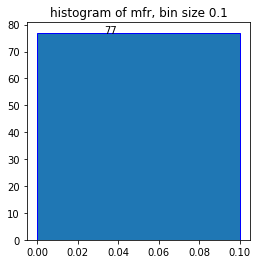

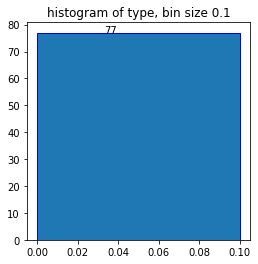

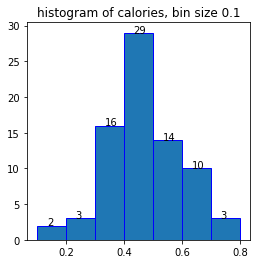

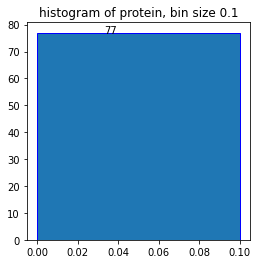

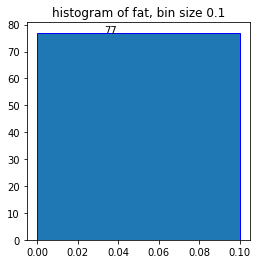

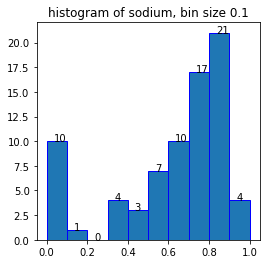

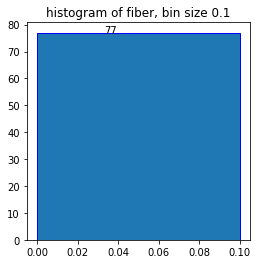

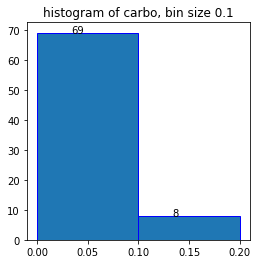

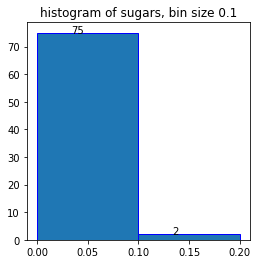

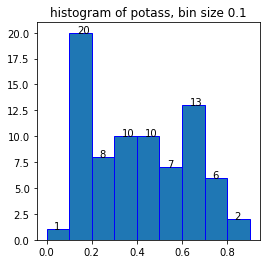

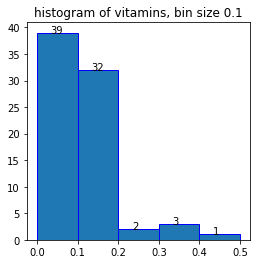

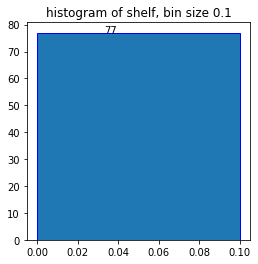

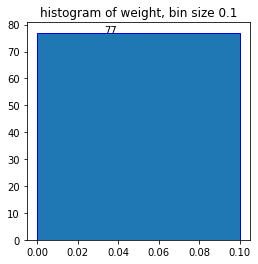

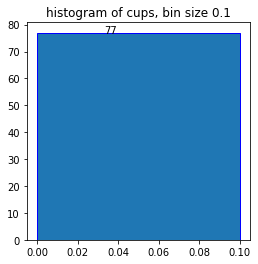

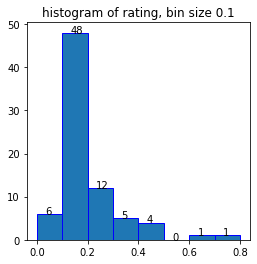

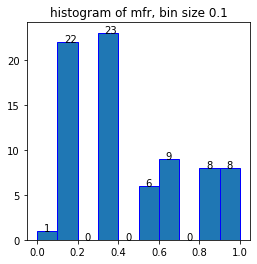

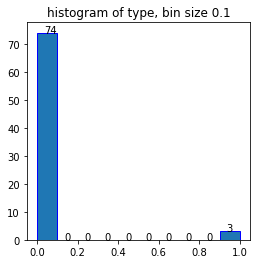

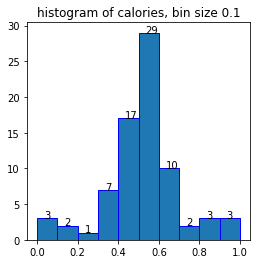

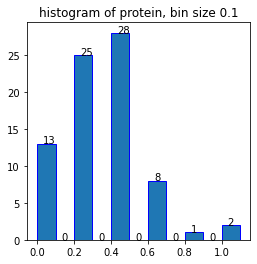

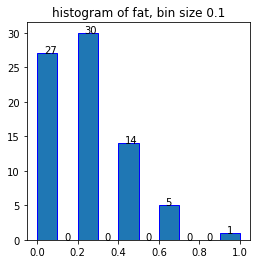

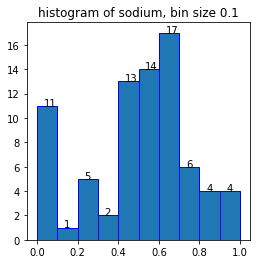

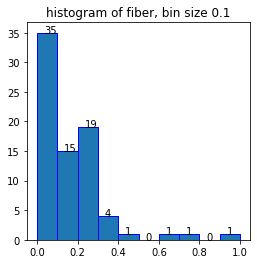

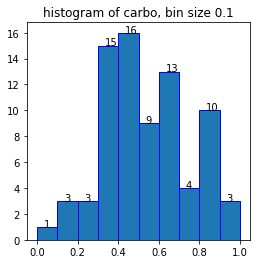

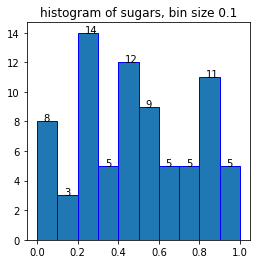

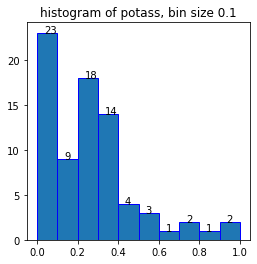

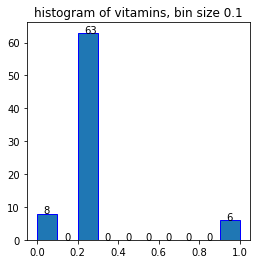

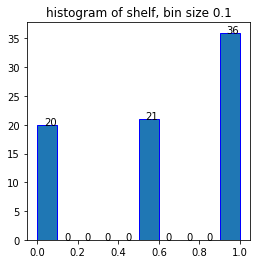

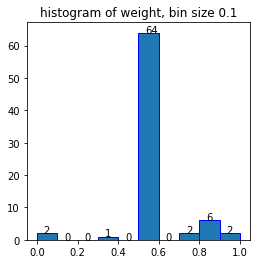

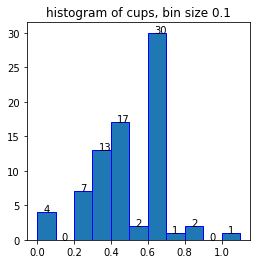

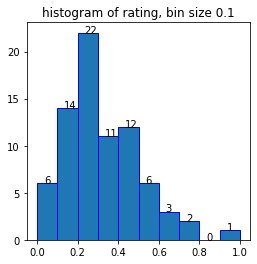

In [187]:
statistic(data_norm)
statistic(data_scaled)

In [189]:
corr = data_norm.corr()
corr_abs = corr.applymap(lambda x: abs(x))
corr_abs[(corr_abs > 0.6) & (corr_abs != 1)]

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.659749
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604644,NaN,NaN,NaN,0.906701,NaN,NaN
protein,NaN,NaN,NaN,NaN,NaN,0.664693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sodium,NaN,NaN,NaN,0.664693,NaN,NaN,NaN,NaN,NaN,0.668580,NaN,NaN,0.643739,NaN,0.784847
fiber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.846487,NaN,NaN,NaN,NaN,NaN
carbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627482,0.710034,0.775616
sugars,NaN,NaN,0.604644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
potass,NaN,NaN,NaN,NaN,NaN,0.668580,0.846487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
corr = data_scaled.corr()
corr_abs = corr.applymap(lambda x: abs(x))
corr_abs[(corr_abs > 0.6) & (corr_abs != 1)]

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696091,NaN,0.689376
protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sodium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.908647,NaN,NaN,NaN,NaN,NaN
carbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sugars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.762181
potass,NaN,NaN,NaN,NaN,NaN,NaN,0.908647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Conclude

a)Which pair of variables is the most strongly correlated?

potass and fiber are most strongly correlated

b)How can we reduce the number of variables based on these correlations?

only leave the columns most correlated to consumer rating or use dim-reduce algors PCA/t-SNE

c)How would the corrections change if we normalize this data first?

changed.


# PCA & LR

In [192]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
x = data_scaled.drop(columns=["rating"],axis=1,inplace = False)
x = x.to_numpy()

y = data_scaled["rating"].values

PCA(n_components=3)

In [217]:
pca = PCA(n_components=3)
pca.fit(x)

PCA(n_components=3)

In [193]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.27067314 0.17047588 0.13441665]
[4.05212169 3.21581733 2.85552805]


In [194]:
xx = pca.transform(x)

In [195]:
xx

array([[-0.79026293,  0.57660074, -0.18881556],
       [-0.53808631,  0.31122861, -0.63420626],
       [-0.77345372,  0.3899229 ,  0.08022193],
       [-0.73853496,  0.84728194,  0.24553965],
       [-0.3476459 ,  0.07532718, -0.14587217],
       [ 0.44632734, -0.29266446, -0.33514071],
       [ 0.14709642, -0.31785783, -0.35931641],
       [-0.4090257 , -0.32695757,  0.19369199],
       [ 0.48185585,  0.27437636, -0.21580972],
       [-0.4352923 ,  0.3046169 ,  0.14938067],
       [ 0.11268581, -0.27905195, -0.42281905],
       [ 0.52799147,  0.02696071,  0.44543998],
       [ 0.09701519, -0.42672834, -0.15961805],
       [-0.451418  , -0.03434803,  0.0209035 ],
       [ 0.15383086, -0.48083661, -0.26209246],
       [ 0.80908612,  0.0682768 ,  0.24478989],
       [ 0.78515643, -0.10704797,  0.44862692],
       [ 0.21731418, -0.26237995, -0.28881058],
       [ 0.14439559, -0.47497586, -0.26350477],
       [-0.59193366,  0.07941826, -0.15070079],
       [ 0.37104468,  0.62203374,  0.293

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, y, test_size=0.3, random_state=12345)

In [203]:
print(x_train,y_train)

[[0.66666667 0.         0.45454545 0.4        0.2        0.4375
  0.21428571 0.55555556 0.33333333 0.22222222 0.25       1.
  0.5        0.504     ]
 [0.16666667 0.         0.54545455 0.2        0.2        0.625
  0.         0.88888889 0.2        0.06349206 1.         1.
  0.5        0.6       ]
 [0.16666667 0.         0.45454545 0.2        0.2        0.4375
  0.14285714 0.33333333 0.66666667 0.33333333 0.25       1.
  0.5        0.4       ]
 [0.33333333 0.         0.45454545 0.4        0.         1.
  0.07142857 0.83333333 0.2        0.0952381  1.         1.
  0.5        0.6       ]
 [0.33333333 0.         0.54545455 0.2        0.2        0.21875
  0.07142857 0.22222222 1.         0.07936508 0.25       0.5
  0.5        0.4       ]
 [0.5        0.         0.36363636 0.4        0.         0.
  0.21428571 0.83333333 0.         0.33333333 0.         0.
  0.5        0.336     ]
 [0.16666667 0.         0.72727273 0.4        0.4        0.53125
  0.10714286 0.47222222 0.66666667 0.33333333 0.

In [211]:
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [215]:
models = [SVR,SGDRegressor,BayesianRidge,LassoLars,ARDRegression,
          PassiveAggressiveRegressor,TheilSenRegressor,LinearRegression]
# models = [LinearRegression]

for model_cls in models:
    model = model_cls()
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = mean_squared_error(y_test,pred)
    print("test mse of model {} without pca is {}.".format(model.__class__.__name__, acc))

test mse of model SVR without pca is 0.009032961919145535.
test mse of model SGDRegressor without pca is 0.037438749151964074.
test mse of model BayesianRidge without pca is 0.0011204906364997286.
test mse of model LassoLars without pca is 0.03667568854855401.
test mse of model ARDRegression without pca is 0.0011205196861830697.
test mse of model PassiveAggressiveRegressor without pca is 0.005096672098823002.
test mse of model TheilSenRegressor without pca is 0.0011204887688232707.
test mse of model LinearRegression without pca is 0.0011205259012265455.


In [216]:
for model_cls in models:
    model = model_cls()
    model.fit(xx_train,yy_train)
    pred = model.predict(xx_test)
    acc = mean_squared_error(yy_test,pred)
    print("test mse of model {} with pca is {}.".format(model.__class__.__name__, acc))

test mse of model SVR with pca is 0.007579782353899609.
test mse of model SGDRegressor with pca is 0.02667579922757113.
test mse of model BayesianRidge with pca is 0.0056343658777519845.
test mse of model LassoLars with pca is 0.03667568854855401.
test mse of model ARDRegression with pca is 0.005710364103469631.
test mse of model PassiveAggressiveRegressor with pca is 0.7189278522116463.
test mse of model TheilSenRegressor with pca is 0.005301477246321688.
test mse of model LinearRegression with pca is 0.005726080590725218.
